In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/My Dataset'

train_dir = dataset_path + '/train'
test_dir = dataset_path + '/test'

In [3]:
# Basic imports
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Test data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 591 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


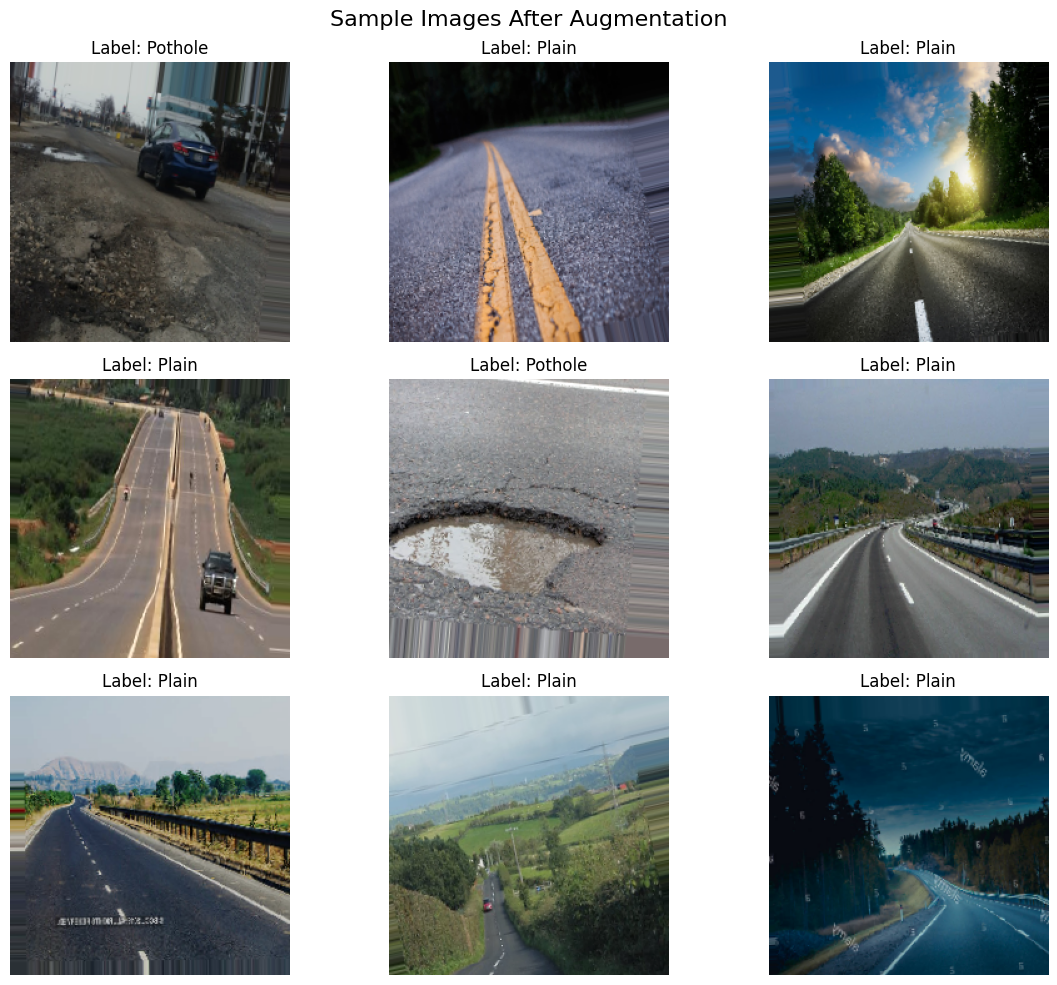

In [4]:
def show_sample_images(generator):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(12, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {class_names[int(labels[i])].capitalize()}")
        plt.axis("off")
    plt.suptitle("Sample Images After Augmentation", fontsize=16)
    plt.tight_layout()
    plt.savefig("/content/sample_training_images.png")
    plt.show()

show_sample_images(train_generator)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

custom_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

custom_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
custom_history = custom_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

# Evaluate
loss, accuracy = custom_model.evaluate(test_generator)
print(f"Custom CNN - Test Accuracy: {accuracy:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 276s 15s/step - accuracy: 0.5595 - loss: 0.7802 - val_accuracy: 0.6892 - val_loss: 0.5786
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8236 - loss: 0.4539 - val_accuracy: 0.8176 - val_loss: 0.4095
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8407 - loss: 0.3908 - val_accuracy: 0.7365 - val_loss: 0.4797
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8238 - loss: 0.3815 - val_accuracy: 0.8176 - val_loss: 0.4497
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8949 - loss: 0.2970 - val_accuracy: 0.7973 - val_loss: 0.4655
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8850 - loss: 0.2820 - val_accuracy: 0.8176 - val_loss: 0.4169
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8797 - loss: 0.2739 - val_accuracy: 0.8108 - val_loss: 0.4176
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9229 - loss: 0.2049 - val_accuracy: 0.8108 - val_loss: 0.4434
E

In [37]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
y_pred_probs = custom_model.predict(test_generator)
y_pred = (y_pred_probs > 0.6).astype(int).reshape(-1)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step
Classification Report:
               precision    recall  f1-score   support

       Plain       0.86      0.85      0.86        75
     Pothole       0.85      0.86      0.86        73

    accuracy                           0.86       148
   macro avg       0.86      0.86      0.86       148
weighted avg       0.86      0.86      0.86       148



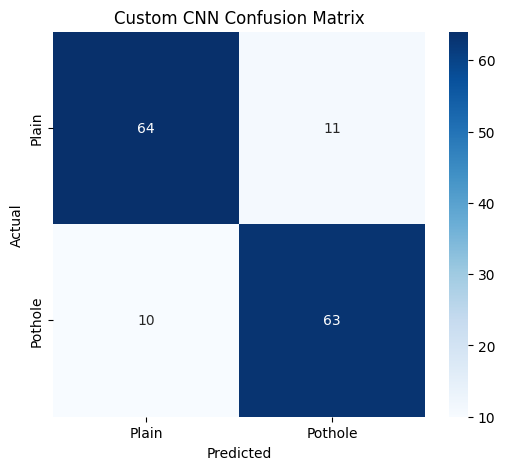

In [38]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Custom CNN Confusion Matrix')
plt.savefig("/content/custom_cnn_confusion_matrix.png")
plt.show()

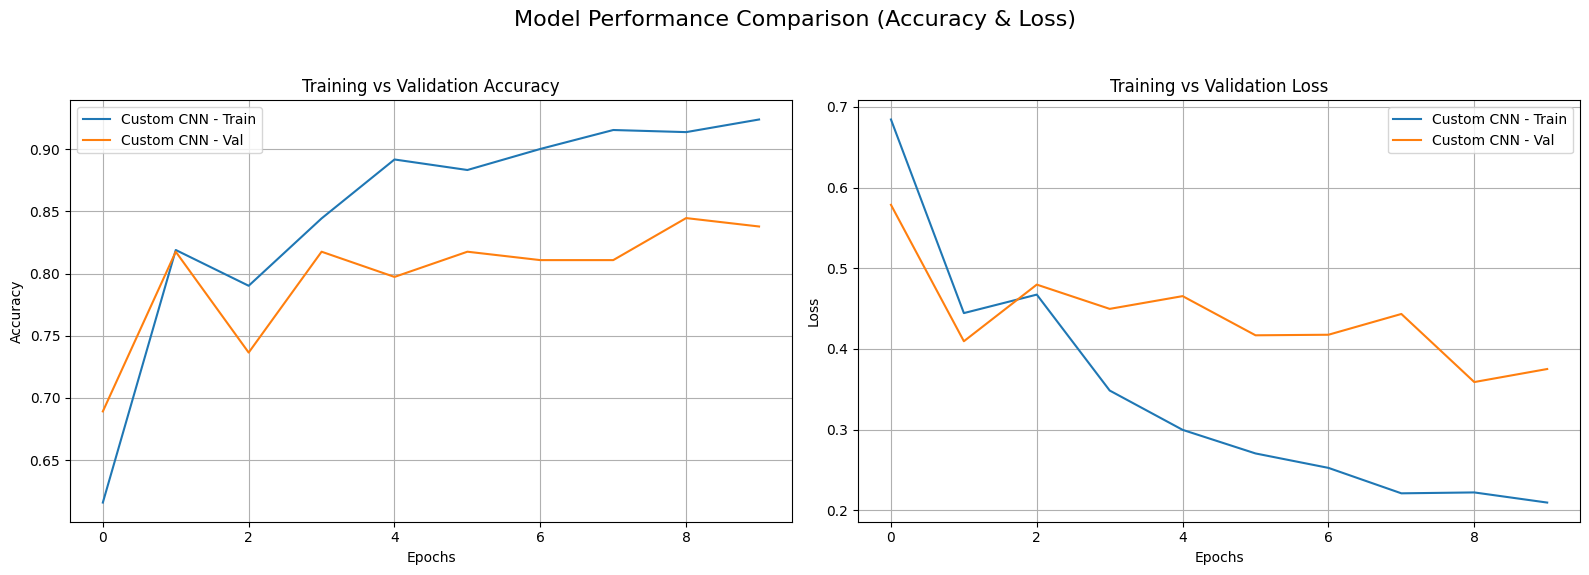

In [14]:
import matplotlib.pyplot as plt

# Create a 2-row, 2-column plot: One row for accuracy, one for loss
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy subplot
axes[0].plot(custom_history.history['accuracy'], label='Custom CNN - Train')
axes[0].plot(custom_history.history['val_accuracy'], label='Custom CNN - Val')
axes[0].set_title('Training vs Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss subplot
axes[1].plot(custom_history.history['loss'], label='Custom CNN - Train')
axes[1].plot(custom_history.history['val_loss'], label='Custom CNN - Val')
axes[1].set_title('Training vs Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Model Performance Comparison (Accuracy & Loss)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("/content/all_models_accuracy_loss_comparison.png", dpi=300)
plt.show()

In [15]:
# ✅ Overfitting-Resistant CNN using Transfer Learning (MobileNetV2)

import os, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# ─── 1) Parameters ─────────────────────────────────────
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20

train_dir = '/content/drive/My Drive/My Dataset/train'
test_dir  = '/content/drive/My Drive/My Dataset/test'

# ─── 2) Data Augmentation ─────────────────────────────
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_aug = ImageDataGenerator(rescale=1./255)

train_gen = train_aug.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_gen = val_aug.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# ─── 3) MobileNetV2 Model ─────────────────────────────
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# ─── 4) Callbacks ─────────────────────────────────────
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.2)
]

# ─── 5) Train ─────────────────────────────────────────
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=2
)






Found 591 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 - 39s - 1s/step - accuracy: 0.6007 - loss: 0.7053 - val_accuracy: 0.8311 - val_loss: 0.4437 - learning_rate: 1.0000e-04
Epoch 2/20
37/37 - 19s - 503ms/step - accuracy: 0.8274 - loss: 0.4014 - val_accuracy: 0.8716 - val_loss: 0.3418 - learning_rate: 1.0000e-04
Epoch 3/20
37/37 - 19s - 511ms/step - accuracy: 0.9052 - loss: 0.2701 - val_accuracy: 0.8716 - val_loss: 0.3014 - learning_rate: 1.0000e-04
Epoch 4/20
37/37 - 21s - 562ms/step - accuracy: 0.9222 - loss: 0.2336 - val_accuracy: 0.8919 - val_loss: 0.2784 - learning_rate: 1.0000e-04
Epoch 5/20
37/37 - 19s - 514ms/step - accuracy: 0.9374 - loss: 0.1947 - val_accuracy: 0.8986 - val_loss: 0.2594 - learning_rate: 1.0000e-04
Epoch 6/20
37/37 - 19s - 523ms/step - accuracy: 0.9509 - loss: 0.1677 - val_accuracy: 0.8919 - val_loss: 0.2734 - learning_rate: 1.0000e-04
Epoch 7/20
37/37 - 26s - 714ms/step - accuracy: 0.9408 - loss: 0.1788 - val_accuracy: 0.8919 - val_loss: 0.2718 - learning_rate: 1.0000e-04
Epoch 8/20
37/37 - 19s - 505ms/ste

In [16]:
# ✅ Evaluation: Classification Report & Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get Predictions
val_gen.reset()
y_pred_prob = model.predict(val_gen)
y_pred = (y_pred_prob > 0.6).astype("int32").flatten()

# Step 2: Get True Labels
y_true = val_gen.classes
class_names = list(val_gen.class_indices.keys())

# Step 3: Classification Report
print(" Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 544ms/step
 Classification Report:
              precision    recall  f1-score   support

       Plain       0.85      0.96      0.90        75
     Pothole       0.95      0.82      0.88        73

    accuracy                           0.89       148
   macro avg       0.90      0.89      0.89       148
weighted avg       0.90      0.89      0.89       148



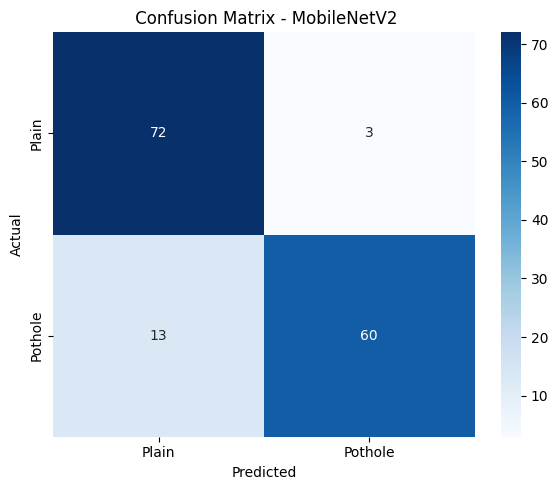

In [17]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(" Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Save confusion matrix image
plt.savefig("mobilenetv2_confusion_matrix.png")
plt.show()

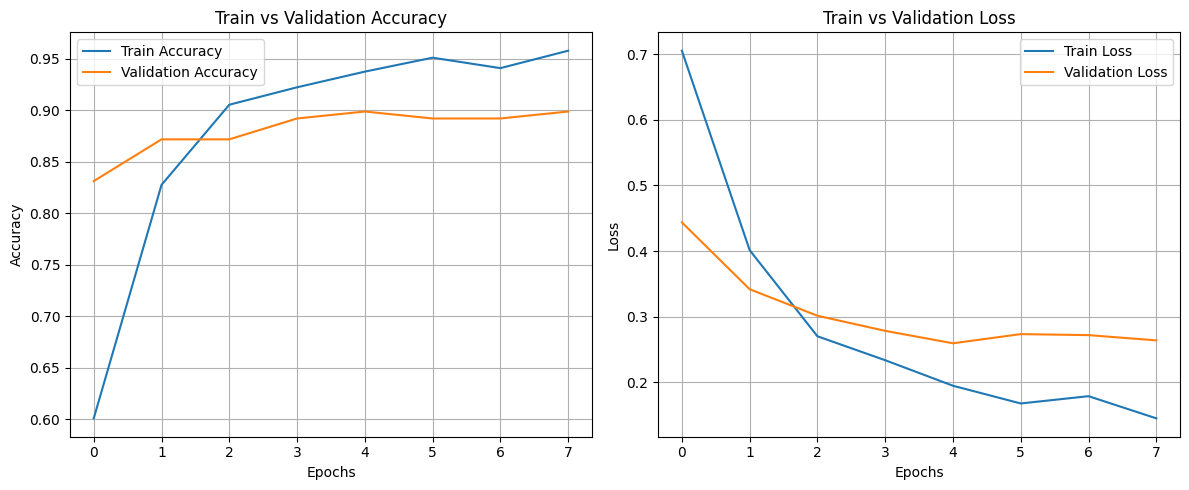

In [18]:
# ─── 8) Accuracy and Loss Curves ─────────────────────
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("/content/train_val_accuracy_loss.png", dpi=300)
plt.show()

In [22]:
# ─── 0) ResNet50 Model Setup ─────────────────────────
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.2)
]

# ─── 1) Train ─────────────────────────────────────────
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 - 38s - 1s/step - accuracy: 0.4687 - loss: 0.8429 - val_accuracy: 0.5068 - val_loss: 0.6921 - learning_rate: 1.0000e-04
Epoch 2/30
37/37 - 22s - 594ms/step - accuracy: 0.5178 - loss: 0.7429 - val_accuracy: 0.5743 - val_loss: 0.6861 - learning_rate: 1.0000e-04
Epoch 3/30
37/37 - 19s - 520ms/step - accuracy: 0.4890 - loss: 0.7496 - val_accuracy: 0.5068 - val_loss: 0.6880 - learning_rate: 1.0000e-04
Epoch 4/30
37/37 - 21s - 565ms/step - accuracy: 0.4941 - loss: 0.7269 - val_accuracy: 0.5608 - val_loss: 0.6828 - learning_rate: 1.0000e-04
Epoch 5/30
37/37 - 19s - 518ms/step - accuracy: 0.5465 - loss: 0.6945 - val_accuracy: 0.7230 - val_loss: 0.6798 - learning_rate: 1.0000e-04
Epoch 6/30
37/37 - 20s - 543ms/step - accuracy: 0.5110 - loss: 0.7092 - val_accuracy: 0.5068 - val_loss: 0.6813 - learning_rate: 1.0000e-04
Epoch 7/30
37/37 - 19s - 520ms/step - accuracy: 0.5008 - loss: 0.7008 - val_accuracy: 0.5405 - val_loss: 0.6773 - learning_rate: 1.0000e-04
Epoch 8/30
37/37 - 20s - 531ms/ste

In [23]:
# ─── 4) Final Evaluation ─────────────────────────────
loss, acc = model.evaluate(val_gen, verbose=0)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")


✅ Final Validation Accuracy: 0.7568


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step
Confusion Matrix:
 [[68  7]
 [17 56]]
Classification Report:
               precision    recall  f1-score   support

       Plain       0.80      0.91      0.85        75
     Pothole       0.89      0.77      0.82        73

    accuracy                           0.84       148
   macro avg       0.84      0.84      0.84       148
weighted avg       0.84      0.84      0.84       148



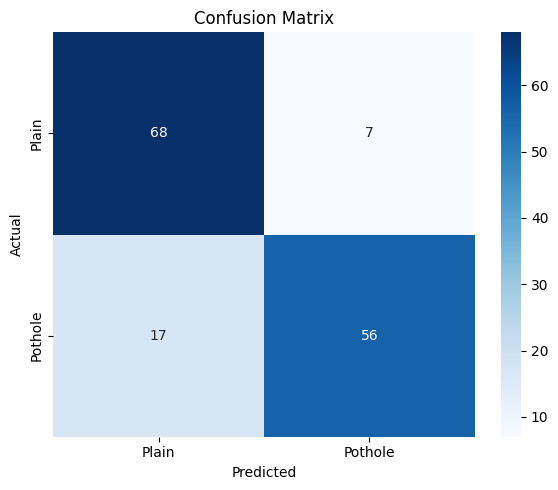

In [27]:
# ─── 2) Confusion Matrix & Report ─────────────────────
y_true = val_gen.classes
y_prob = model.predict(val_gen).ravel()
y_pred = (y_prob > 0.6).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("/content/resnet50_confusion_matrix.png", dpi=300)
plt.show()

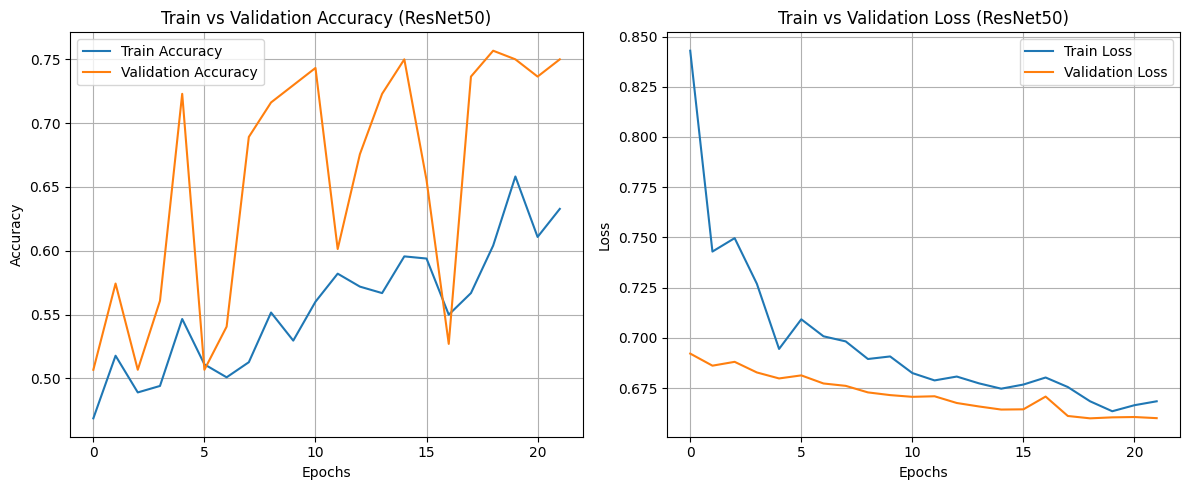

In [25]:
# ─── 3) Accuracy and Loss Curves ─────────────────────
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy (ResNet50)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (ResNet50)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("/content/resnet50_accuracy_loss.png", dpi=300)
plt.show()

In [26]:
# ─── 0) VGG16 Model Setup ─────────────────────────
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.2)
]

# ─── 1) Train ─────────────────────────────────────────
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    verbose=2
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


37/37 - 44s - 1s/step - accuracy: 0.4975 - loss: 0.7483 - val_accuracy: 0.4459 - val_loss: 0.7094 - learning_rate: 1.0000e-04
Epoch 2/20
37/37 - 22s - 598ms/step - accuracy: 0.5262 - loss: 0.7093 - val_accuracy: 0.5608 - val_loss: 0.6768 - learning_rate: 1.0000e-04
Epoch 3/20
37/37 - 20s - 545ms/step - accuracy: 0.5584 - loss: 0.6882 - val_accuracy: 0.7297 - val_loss: 0.6490 - learning_rate: 1.0000e-04
Epoch 4/20
37/37 - 21s - 560ms/step - accuracy: 0.5973 - loss: 0.6550 - val_accuracy: 0.8243 - val_loss: 0.6255 - learning_rate: 1.0000e-04
Epoch 5/20
37/37 - 20s - 527ms/step - accuracy: 0.6514 - loss: 0.6342 - val_accuracy: 0.7905 - val_loss: 0.6032 - learning_rate: 1.0000e-04
Epoch 6/20
37/37 - 21s - 558ms/step - accuracy: 0.7191 - loss: 0.5853 - val_accuracy: 0.8378 - val_loss: 0.5811 - learning_rate: 1.0000e-04
Epoch 7/20
37/37 - 20s - 534ms/step - accuracy: 0.7293 - loss: 0.5635 - val_accuracy: 0.8514 - val_loss: 0.5614 - learning_rate: 1.0000e-04
Epoch 8/20
37/37 - 21s - 559ms/ste

In [29]:
# ─── 4) Final Evaluation ─────────────────────────────
loss, acc = model.evaluate(val_gen, verbose=0)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")



✅ Final Validation Accuracy: 0.8581


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step
Confusion Matrix:
 [[62 13]
 [ 8 65]]
Classification Report:
               precision    recall  f1-score   support

       Plain       0.89      0.83      0.86        75
     Pothole       0.83      0.89      0.86        73

    accuracy                           0.86       148
   macro avg       0.86      0.86      0.86       148
weighted avg       0.86      0.86      0.86       148



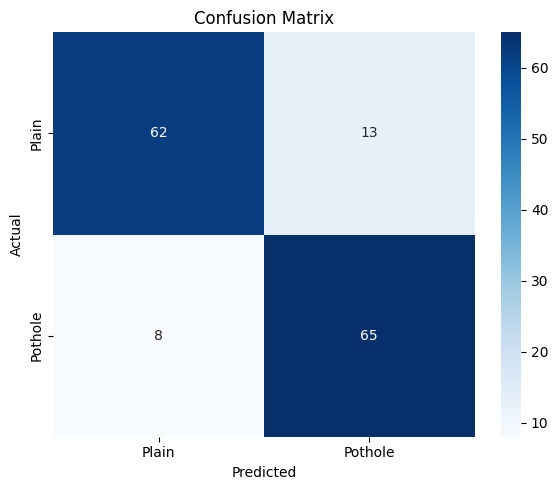

In [34]:
# ─── 2) Confusion Matrix & Report ─────────────────────
y_true = val_gen.classes
y_prob = model.predict(val_gen).ravel()
y_pred = (y_prob > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("/content/vgg16_confusion_matrix.png", dpi=300)
plt.show()

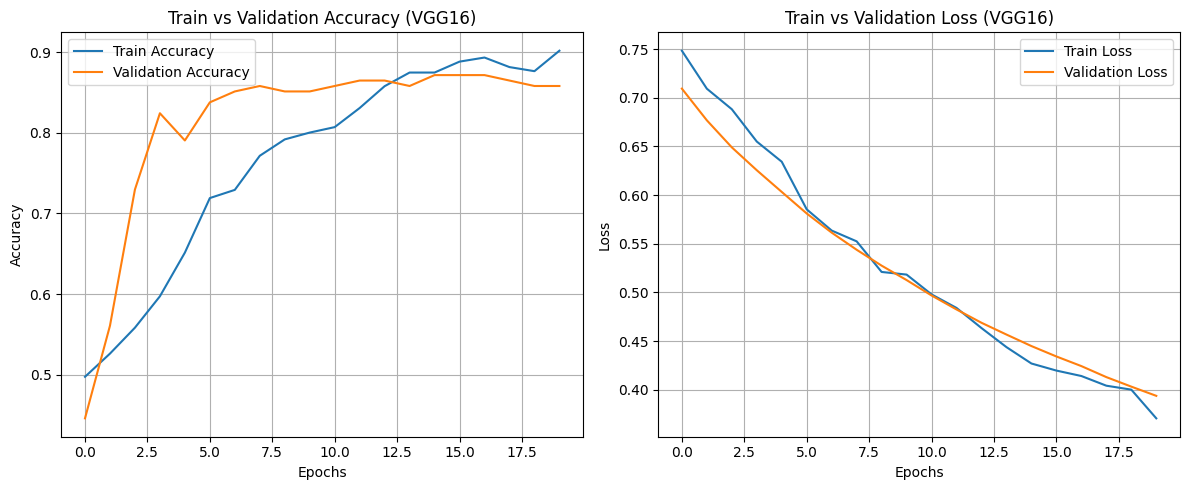

In [31]:
# ─── 3) Accuracy and Loss Curves ─────────────────────
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("/content/vgg16_accuracy_loss.png", dpi=300)
plt.show()

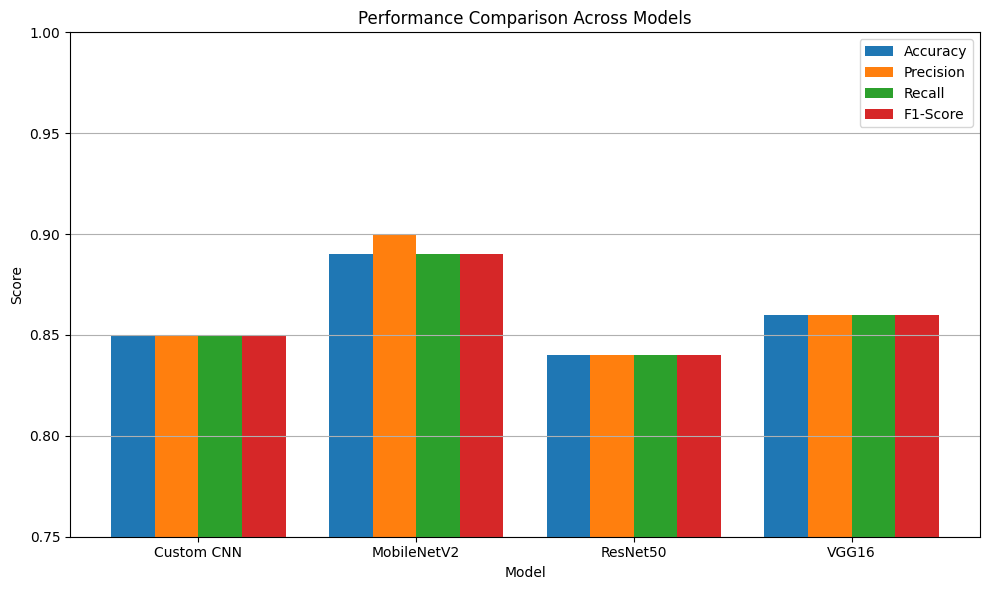

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Model metrics
metrics = {
    'Custom CNN':     {'accuracy': 0.85, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85},
    'MobileNetV2':    {'accuracy': 0.89, 'precision': 0.90, 'recall': 0.89, 'f1': 0.89},
    'ResNet50':       {'accuracy': 0.84, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84},
    'VGG16':          {'accuracy': 0.86, 'precision': 0.86, 'recall': 0.86, 'f1': 0.86}
}

models = list(metrics.keys())
x = np.arange(len(models))  # the label locations
width = 0.2  # width of the bars

# Extract metric values
accuracy = [metrics[m]['accuracy'] for m in models]
precision = [metrics[m]['precision'] for m in models]
recall = [metrics[m]['recall'] for m in models]
f1 = [metrics[m]['f1'] for m in models]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1-Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison Across Models')
plt.xticks(x, models)
plt.ylim(0.75, 1.0)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("model_comparison_bar_plot.png")
plt.show()
